In [1]:
import os
os.chdir('../') 

In [2]:
from lib.readfile import ReadFile as rf
from lib.handle_null_values import handle_null_values as null
from lib.datetime_formatting import DatetimeFormatting as dfmt
from lib.split_time_variable import split_time_variable as split_t
from lib.correct_variable_types import correct_variable_types as vartype
from lib.handle_null_values import handle_null_values as nulval

/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
"""Read the file"""

r= rf()
df= r.read(address="lib/data/tbl_property_details_mls_2019.csv")

In [4]:
"""Remove column with null values"""

n= null()
variables= n.delete_var_with_null_more_than(df, percentage=20)

In [5]:
"""drop unwanted variables for now"""

df2= df.drop(*variables)

In [6]:
"""select important variables""" 

important_variables=['year_built', 'bedroom_count', 'bathroom_count','lot_size', 'area', 'city_name', 'community_name', 'covered_parking', 'exterior', 'energy_source','fireplaces_count', 'floor_covering', 'garage','heating_cooling','latitude','longitude', 'property_type', 'roof', 'sold_date', 'sold_price','unfinished_sq_foot', 'year_built', 'zip_code', 'county' ]

    
important_variables= list(set(important_variables))
df3= df2.select(*important_variables)


In [8]:
"""concatenate all files"""

# files= ["09"]
# for f_no in range(10, 20):
#     files.append(f_no)    
    
#     df4= r.read(address="lib/data/20"+str(f_no)+".csv")
#     df4= df4.select(*important_variables)
#     df3 = df3.union(df4)

file= "tbl_property_details_mls_2019"
for f_no in range(1):  
    
    df4= r.read(address="lib/data/"+file+".csv")
    df4= df4.select(*important_variables)
    df3 = df3.union(df4)

In [7]:
"""filter one county from the dataset"""

df5= df3.filter( df3["county"].isin(["King"]))


In [8]:
"""correct time format"""

f= split_t()

#Assuming time variable is in timestamp type
df6= f.run(df5)


In [9]:
"""Split time variable"""


from pyspark.sql.functions import isnan, when, count, col, from_unixtime
from pyspark.sql.types import DoubleType, TimestampType
from pyspark.sql.functions import *


df6_1= df6.withColumn('sold_date', from_unixtime(unix_timestamp('sold_date', "yyyy-MM-DD")).cast(TimestampType()))
df6_1= df6_1.withColumn('sold_date_year', year('sold_date'))
df6_1= df6_1.withColumn('sold_date_month', month('sold_date'))
df6_1= df6_1.withColumn('sold_date_day', dayofmonth('sold_date'))
# df6_1= df6_1.withColumn('sold_date_day', dayofweek('sold_date'))
df6_1= df6_1.drop('sold_date')


AnalysisException: "cannot resolve '`sold_date`' given input columns: [area, energy_source, exterior, sold_datedayofweek, sold_price, sold_date_month, sold_date_day, roof, zip_code, property_type, fireplaces_count, unfinished_sq_foot, county, bathroom_count, latitude, sold_datesec, longitude, floor_covering, bedroom_count, community_name, sold_datemin, year_built, heating_cooling, covered_parking, sold_datehour, city_name, sold_date_year, garage, lot_size];;\n'Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, sold_date_month#3758, ... 6 more fields]\n+- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, sold_date_month#3758, ... 5 more fields]\n   +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, ... 6 more fields]\n      +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, ... 5 more fields]\n         +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, ... 4 more fields]\n            +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, ... 3 more fields]\n               +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, ... 2 more fields]\n                  +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, sold_date_year#3733, month(cast(sold_date#18 as date)) AS sold_date_month#3758]\n                     +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30, year(cast(sold_date#18 as date)) AS sold_date_year#3733]\n                        +- Filter county#23 IN (King)\n                           +- Project [community_name#99, garage#41, unfinished_sq_foot#75, fireplaces_count#61, exterior#48, lot_size#32, year_built#82, latitude#27, longitude#28, area#26, city_name#22, covered_parking#74, energy_source#141, sold_price#20, county#23, bedroom_count#29, roof#95, floor_covering#62, heating_cooling#43, sold_date#18, zip_code#25, property_type#16, bathroom_count#30]\n                              +- Project [id#10, ml_number#11, mls_created_date#12, mls_updated_date#13, status#14, property_type#16, list_date#17, sold_date#18, list_price#19, sold_price#20, address#21, city_name#22, county#23, state_code#24, zip_code#25, area#26, latitude#27, longitude#28, bedroom_count#29, bathroom_count#30, square_foot#31, lot_size#32, public_comments#36, style#38, ... 116 more fields]\n                                 +- Relation[id#10,ml_number#11,mls_created_date#12,mls_updated_date#13,status#14,status_before_removed#15,property_type#16,list_date#17,sold_date#18,list_price#19,sold_price#20,address#21,city_name#22,county#23,state_code#24,zip_code#25,area#26,latitude#27,longitude#28,bedroom_count#29,bathroom_count#30,square_foot#31,lot_size#32,occupant_name#33,... 371 more fields] csv\n"

In [9]:
"""Correct variable types"""

v= vartype()

df7= v.run(df6)



In [10]:
"""make training and testing files and save them."""
# df_t0= df7.filter( df7["sold_date_year"]>2017)
# df_t= df_t0.filter(df_t0["sold_date_year"]<2019)
df_t= df7.filter( df7["sold_date_month"]<8)
df_tst= df7.filter(df7["sold_date_month"]>=8)

In [12]:
print(df_tst.count())
print(df7.count())
print(df_tst.count()-df7.count())

3287
31804
-28517


In [18]:
df_t= df7.exceptAll(df_tst)
df_t.count()


71854

In [11]:
"""duplicate 2019 data in the training file"""
# df_2019= df_t.filter(df_t["sold_date_year"]==2019)
df_2019= df_t.filter(df_t["sold_date_month"]>=5)

for i in range(3):
    df_t = df_t.union(df_2019)

In [ ]:
df7.toPandas().to_excel("lib/data/king'S_COUNTY7.0.xlsx")

In [12]:
df_train2= df_t.toPandas()
df_test2= df_tst.toPandas()

In [14]:
#convert pandas to dask dataframe
from dask import dataframe as dd 







In [16]:
df_train2.to_excel("lib/data/king_train_10.xlsx")
df_test2.to_excel("lib/data/king_test_10.xlsx")

In [ ]:
# train the deep learning model and put that on the training

# def var_types(df7):
#     categorical_variables= []
#     numerical_variables=[]
#     for dt in df7.dtypes:
#         if dt[1]=="string":
#             categorical_variables.append(dt[0])
#         else:
#             numerical_variables.append(dt[0])
#     return categorical_variables, numerical_variables
        
# categorical_variables, numerical_variables= var_types(df7)

In [ ]:
# """treat null values using deep learning"""

# # add an ID in the dataset
# from pyspark.sql import functions as F
# from pyspark.sql.window import Window as W
# from pyspark import SparkContext
# from pyspark.sql import SparkSession
# from math import *


# spark_context = SparkContext.getOrCreate()
# spark = SparkSession(spark_context)

# windowSpec = W.orderBy(df7.columns[0])
# df7= df7.withColumn("id", F.row_number().over(windowSpec))
# df8= df7.createOrReplaceTempView("customer")

# #use this ID to filter the data and get results.
# base_query = "SELECT * FROM customer where "
# total_rows= df7.count()
# each_page= 500
# total_pages= ceil(total_rows/each_page)

# for p in range(total_pages):
#     query= base_query + "id > " + str(each_page*p) + " and id< " + str(each_page*(p+1))
#     df_spark= spark.sql(query)

#     df_pandas= df_spark.toPandas()
    
#     #pass this through all the models in the same order and run it.
    
    
    





# #save the model for future use.

In [13]:
# train the deep learning model and put that on the training
categorical_variables= []
numerical_variables=[]
all_variables= []
for dt in df_t.dtypes:
    if dt[1]=="string":
        categorical_variables.append(dt[0])
    else:
        numerical_variables.append(dt[0])
        
    all_variables.append(dt[0])
        
        

In [16]:
from dask import dataframe as dd 
df_t11 = dd.from_pandas(df_train2, npartitions=3)

In [24]:
df_train2

,property_type,covered_parking,city_name,county,fireplaces_count,lot_size,community_name,latitude,year_built,garage,...,exterior,heating_cooling,roof,sold_date_year,sold_date_month,sold_date_day,sold_datedayofweek,sold_datehour,sold_datemin,sold_datesec
0,Condominium,0.0,Seattle,King,1.0,0,Greenwood,47.693818,1998.0,None,...,"Cement/Concrete, Stucco",Wall,Flat,2019,2,7,5,0,0,0
1,Residential,0.0,Seattle,King,2.0,4983,West Seattle,47.520020,1949.0,None,...,Wood,"Forced Air, Tankless Water Heater",Composition,2019,2,11,2,0,0,0
2,Residential,1.0,Seattle,King,1.0,1238,Greenwood,47.714865,2001.0,"Garage-Attached, Off Street",...,Wood Products,Forced Air,Composition,2019,3,22,6,0,0,0
3,Condominium,0.0,Seattle,King,1.0,14422,First Hill,47.609287,1970.0,None,...,Cement/Concrete,"Radiant, Window Unit A/C",Flat,1800,1,1,4,0,0,0
4,Residential,2.0,Federal Way,King,0.0,4554,Jovita,47.307329,2007.0,Garage-Attached,...,Metal/Vinyl,Forced Air,Composition,2019,1,30,4,0,0,0
5,Residential,2.0,Auburn,King,1.0,8800,Forest Villa,47.291985,1966.0,Garage-Attached,...,Wood,Forced Air,Composition,2019,1,29,3,0,0,0
6,Residential,3.0,SeaTac,King,0.0,16988,Angle Lake,47.432728,1955.0,"Garage-Attached, Garage-Detached",...,Wood,Forced Air,Torch Down,2019,1,31,5,0,0,0
7,Condominium,0.0,Bellevue,King,0.0,397698,Microsoft,47.639339,1976.0,None,...,Wood Products,Baseboard,Composition,1800,1,1,4,0,0,0
8,Residential,2.0,Kent,King,0.0,5000,Kent,47.333774,2009.0,"Garage-Attached, Off Street",...,"Metal/Vinyl, Wood Products",Forced Air,Composition,2019,1,31,5,0,0,0
9,Residential,1.0,Seattle,King,3.0,5000,Queen Anne,47.638824,1914.0,Garage-Detached,...,See Remarks,"Forced Air, High Efficiency (Unspecified), Tan...",Composition,1800,1,1,4,0,0,0


Train (Size: 58262,29) has Single_Label with target: ['sold_price']
"
 ################### Regression  ######################
    Top columns in Train with missing values: ['garage', 'floor_covering', 'energy_source', 'year_built', 'fireplaces_count']
         and their missing value totals: [12904, 1981, 1564, 1222, 1105]
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  8
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  4
    28 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were some ID or low-information variables
    Completed Scaling of numeric d

<Figure size 720x432 with 0 Axes>

2019-10-19 12:41:45,807 [INFO]  findfont: Found a missing font file.  Rebuilding cache.
2019-10-19 12:41:45,820 [INFO]  font search path ['/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
2019-10-19 12:41:48,449 [INFO]  Could not open font file /Users/muddassarsharif/Library/Fonts/NISC18030.ttf
2019-10-19 12:41:48,764 [INFO]  generated new fontManager


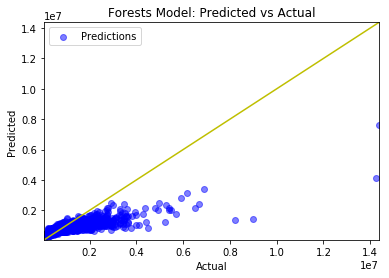

    MAE = 203634.0651
    MAPE = 30%
    RMSE = 378592.9732
    MAE as % std dev of Actuals = 36.7%
    Normalized RMSE (% of MinMax of Actuals) = 3%
    Normalized RMSE (% of Std Dev of Actuals) = 68%
QuickML_Ensembling Model results:
    LassoLarsCV Regression = 452698.9907 
    LassoCV Regularization = 452699.1576
    RidgeCV Regression = 452705.8876 
    Boosting = 593680.4192
########################################################
Completed Ensemble predictions on held out data


<Figure size 720x432 with 0 Axes>

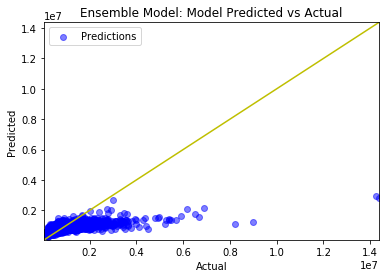

    MAE = 261836.5331
    MAPE = 43%
    RMSE = 447073.3582
    MAE as % std dev of Actuals = 47.2%
    Normalized RMSE (% of MinMax of Actuals) = 3%
    Normalized RMSE (% of Std Dev of Actuals) = 81%
After multiple models, Ensemble Model Results:
    RMSE Score = nan

Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 65930
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 7 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 7
    No variables were removed since no highly correlated variables found in data
    Adding 17 categorical variables to reduced numeric variables  of 7
Selected No. of variables = 24 
Finding Important Features...
        in 24 variables


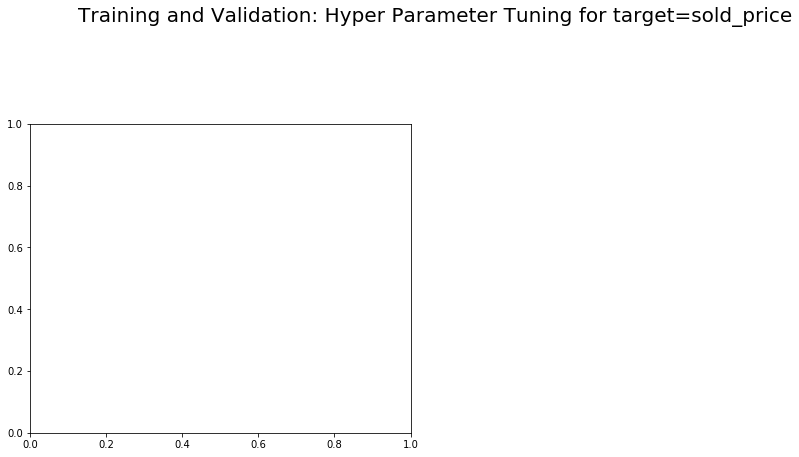

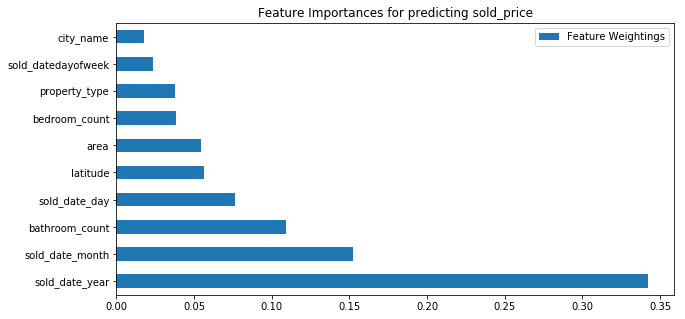

In [26]:
# train auto viml

from autoviml.Auto_ViML import Auto_ViML


model, features, trainm, testm = Auto_ViML(df_train2, "sold_price", test="", sample_submission="", hyper_param='GS', feature_reduction=True, scoring_parameter='weighted-f1', KMeans_Featurizer=False, Boosting_Flag=False, Binning_Flag=False, Add_Poly=False, Stacking_Flag=False,Imbalanced_Flag=False, verbose=2)




In [19]:
import datawig
results= {}
models={}

for c in categorical_variables: 
    var= all_variables.copy()
    var.remove(c)
    imputer = datawig.SimpleImputer(
        input_columns=var, # column(s) containing information about the column we want to impute
        output_column=c, # the column we'd like to impute values for
        output_path = 'lib/Kingimputer_models10.0/'+str(c) # stores model data and metrics
        )
    imputer.fit(train_df=df_t11)
    models[c]= imputer
    #time to test the model with entire file.  
    
#     results[c] = imputer.predict(df_pandas)
    

    

ValueError: Need a non-empty DataFrame for fitting Imputer model

In [24]:
xyz= df_test2
for c in categorical_variables:
    m= models[c]
    xyz= m.predict(xyz)
    


xyz2= df_train2
for c in categorical_variables:
    m= models[c]
    xyz2= m.predict(xyz2)


/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/datawig/calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)
/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/datawig/calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)
/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/datawig/calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)
/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/datawig/calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)
/Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/datawig/calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)
/Users/muddassarsharif/Desktop/muddassar/productio

In [25]:
def delete_extra_categorical_variables(df=None, variables=None):
    if variables==None:
        varaibles= self.categorical_variables
        
        #make a list of all the categorical columns. 
    no_n=[]   

        #delete all unnecessary columns, including the one that make no senese.
    for cv in variables:
        no_n.append(cv+'_imputed_proba')
        no_n.append(cv)

    df= df.drop(no_n, axis=1)
        
    return df


xyz111= delete_extra_categorical_variables(xyz, categorical_variables)


In [26]:
#Run h2o library offfline
xyz222= delete_extra_categorical_variables(xyz2, categorical_variables)

In [27]:
xyz111.to_excel("lib/data/king_train_9.1.xlsx")
xyz222.to_excel("lib/data/king_test_9.1.xlsx")

In [37]:
# xyz111.to_parquet("lib/data/King'S_COUNTY_test7.0.parquet",engine='fastparquet', compression='gzip'))
# # xyz222.to_excel("lib/data/King'S_COUNTY_train7.0.xlsx")

from fastparquet import write 
write("lib/data/king_test_9.1.parquet", xyz111)
write("lib/data/king_train_9.1.xlsx", xyz222)

ModuleNotFoundError: No module named 'fastparquet'

In [ ]:
xyz222.to_parquet("lib/data/King'S_COUNTY_train7.0.xlsx",engine='fastparquet', compression='gzip')

In [ ]:
write("lib/data/King'S_COUNTY_train7.1.parquet", xyz222)

In [39]:
!pip install fastparquet

  Using cached https://files.pythonhosted.org/packages/58/49/dccb790fa17ab3fbf84a6b848050083c7a1899e9586000e34e3e4fbf5538/fastparquet-0.3.2.tar.gz
  Running setup.py bdist_wheel for fastparquet ... error
  Complete output from command /Users/muddassarsharif/Desktop/muddassar/production/API/env4/bin/python3 -u -c "import setuptools, tokenize;__file__='/private/var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/pip-install-qb287m4g/fastparquet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/pip-wheel-p_vukt_0 --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.6
  creating build/lib.macosx-10.9-x86_64-3.6/fastparquet
  copying fastparquet/encoding.py -> build/lib.macosx-10.9-x86_64-3.6/fastparquet
  copying fastparquet/util.py -> build/lib.macosx-10

Command "/Users/muddassarsharif/Desktop/muddassar/production/API/env4/bin/python3 -u -c "import setuptools, tokenize;__file__='/private/var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/pip-install-qb287m4g/fastparquet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /private/var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/pip-record-5ez9s2nt/install-record.txt --single-version-externally-managed --compile --install-headers /Users/muddassarsharif/Desktop/muddassar/production/API/env4/include/site/python3.6/fastparquet" failed with error code 1 in /private/var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/pip-install-qb287m4g/fastparquet/
You are using pip version 18.1, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd


In [33]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_191"; Java(TM) SE Runtime Environment (build 1.8.0_191-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /Users/muddassarsharif/Desktop/muddassar/production/API/env4/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/tmpllf2lbbd
  JVM stdout: /var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/tmpllf2lbbd/h2o_muddassarsharif_started_from_python.out
  JVM stderr: /var/folders/2h/ylrmltv95sd1_w40dsmy51m00000gn/T/tmpllf2lbbd/h2o_muddassarsharif_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_muddassarsharif_h7enal
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [34]:
# train = h2o.import_file("lib/data/Snohomish'S_COUNTY_train6.3.csv")
# test = h2o.import_file("lib/data/Snohomish'S_COUNTY_test6.3.csv")

train = h2o.H2OFrame(xyz222)
test = h2o.H2OFrame(xyz111)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [35]:
# Identify predictors and response
x = train.columns
y = 'sold_price'
x.remove(y)

In [ ]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=50, seed=200)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████

In [41]:
preds = aml.leader.predict(test)

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
p= preds.as_data_frame()

In [ ]:
import numpy as np
lst_p = list(np.array(p['predict']))
lst_a = list(np.array(test.as_data_frame()['sold_price']))

new_lst = []
mape= []
for i in range(len(lst_p)):
    
    mape.append(float(float(((lst_p[i]-lst_a[i])**2)**(1/2))/lst_a[i]))
    new_lst.append(float(lst_p[i]))


In [ ]:
re= test.as_data_frame()

In [ ]:
re["sold_price_predict"]= new_lst
re["APE"]= mape

In [ ]:
re.to_excel("lib/data/POC-draft-King-9.0.xlsx")

In [ ]:
model_path = h2o.save_model(model=aml.leader, path="lib/data/mymodel-King9.0", force=True)

In [ ]:
df7.dtypes

In [ ]:
df7.write.parquet("lib/data/df7.parquet")

In [ ]:
# Read in the Parquet file created above.
# Parquet files are self-describing so the schema is preserved.
# The result of loading a parquet file is also a DataFrame.

# imports
from pyspark import SparkContext
from pyspark.sql import SparkSession
from lib.logs import logger

spark_context = SparkContext.getOrCreate()
spark = SparkSession(spark_context)
df71 = spark.read.parquet("lib/data/df7.parquet")

In [ ]:
df71.dtypes

In [ ]:
xyz111.count()

In [ ]:
from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

housing = load_boston()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,
                                                    train_size=0.75, test_size=0.25)



In [ ]:
!pip install -U seaborn